In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.45362504, -0.38294066, -0.1866685 , -0.3157792 , -0.44120952,
         0.08654485, -0.42515421, -0.32542187, -0.4791303 , -0.82146624],
       [-0.654646  , -0.82282878, -0.88199135,  1.5736313 ,  1.78668563,
         0.22582817, -0.01992685,  0.26395077, -0.60689371, -0.02877066]])

In [4]:
test_Features[:2]

array([[-0.82924579, -0.62966502, -0.94885745,  1.80392714,  1.72696139,
         0.21045434, -0.5130073 , -0.18341796,  0.38987162, -0.05584151],
       [ 0.11509952, -0.53950703,  0.46569923, -0.79715767, -0.52355658,
         0.72456724,  0.39816357,  0.46249696,  0.66144645, -0.93068101]])

In [5]:
train_Label[:4]

array([1, 1, 0, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=20*5,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=20*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=20*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=20*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Conv1D(filters=20,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [19]:
model.add(MaxPooling1D(pool_size=1))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(10, activation='tanh'))

In [22]:
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 100)           200       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 80)            8080      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 80)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 60)            4860      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 60)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 40)            2440      
__________

In [24]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [25]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 3s 255us/step - loss: 0.6315 - acc: 0.6604 - val_loss: 0.5366 - val_acc: 0.7517
Epoch 2/30
10194/10194 [==============================] - 2s 162us/step - loss: 0.4570 - acc: 0.8001 - val_loss: 0.3736 - val_acc: 0.8407
Epoch 3/30
10194/10194 [==============================] - 2s 162us/step - loss: 0.3779 - acc: 0.8428 - val_loss: 0.3391 - val_acc: 0.8572
Epoch 4/30
10194/10194 [==============================] - 2s 168us/step - loss: 0.3570 - acc: 0.8528 - val_loss: 0.3273 - val_acc: 0.8615
Epoch 5/30
10194/10194 [==============================] - 2s 158us/step - loss: 0.3497 - acc: 0.8554 - val_loss: 0.3238 - val_acc: 0.8615
Epoch 6/30
10194/10194 [==============================] - 1s 146us/step - loss: 0.3443 - acc: 0.8596 - val_loss: 0.3217 - val_acc: 0.8619
Epoch 7/30
10194/10194 [==============================] - 1s 146us/step - loss: 0.3397 - acc: 0.8591 - val_loss: 0.3256 - v

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

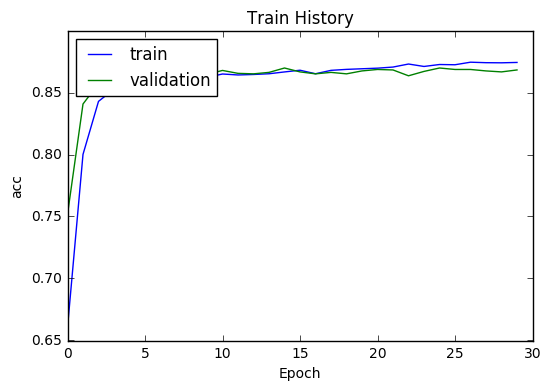

In [27]:
show_train_history(train_history,'acc','val_acc')

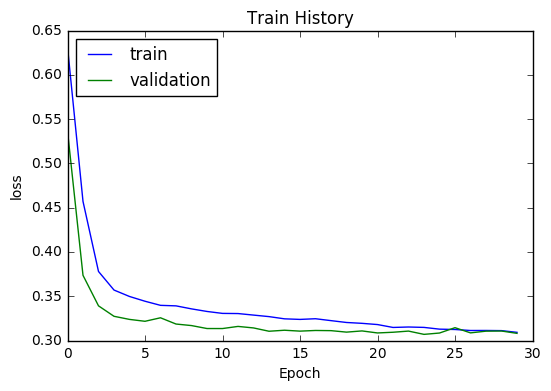

In [28]:
show_train_history(train_history,'loss','val_loss')

In [29]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 0s 54us/step


In [30]:
scores[1]

0.8644256810673259